# Evaluation for Multi-label problems with Sklearn

## Imports - Metrics used

In [1]:
import numpy as np

#Metrics
from sklearn import metrics

import matplotlib.pyplot as plt
import scipy as scipy
import itertools as itertools

## Data to evaluate

6 observations with 3 binary classes and infrequent positive (1) class

In [2]:
n_observations = 6
n_classes = 3

In [5]:
yGold = np.array([[1,0,0],[0,1,0],[0,0,1],[1,0,1],[0,0,0],[1,1,1]])
y_ = np.array([[1,1,1],[1,1,1],[0,0,1],[1,0,1],[0,0,0],[1,1,1]])
#y_ = np.ones(shape=(6,3),dtype='int')
print('Ground truth:\n%s' % yGold)
print('Predicted:\n%s' % y_)


Ground truth:
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 1]
 [0 0 0]
 [1 1 1]]
Predicted:
[[1 1 1]
 [1 1 1]
 [0 0 1]
 [1 0 1]
 [0 0 0]
 [1 1 1]]


## Evaluation

### Accuracy score

The **accuracy_score** function computes the **accuracy**, either the **fraction (default)** or the **count (normalize=False)** of correct predictions.<br><br>
In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.<br><br>

<img src="http://scikit-learn.org/stable/_images/math/cd4bea15b385d15cceb8e24f68976da7d8510290.png">

In [6]:
#The fraction - Default
acc_score = metrics.accuracy_score(y_true=yGold,y_pred=y_)
print('Fraction: %.2f' %acc_score)

Fraction: 0.67


In [7]:
#The count - (normalize = False)

In [8]:
acc_score_count = metrics.accuracy_score(y_true=yGold,y_pred=y_,normalize=False)
print('Count: %d' %acc_score_count)

Count: 4


### Pure multiclass and multilabel classification

In multiclass and multilabel classification task, the notions of precision, recall, and F-measures can be applied to each label independently. There are a few ways to combine results across labels, specified by the average argument to the **average_precision_score** (multilabel only), **f1_score**, **fbeta_score**, **precision_recall_fscore_support**, **precision_score** and **recall_score** function

### Average precision score

In [9]:
apc_micro = metrics.average_precision_score(yGold,y_,average='micro')
apc_macro = metrics.average_precision_score(yGold,y_,average='macro')
apc_weighted = metrics.average_precision_score(yGold,y_,average='weighted')

print('Average precision scores:')
print('micro: %.2f - macro: %.2f - weighted: %.2f' % (apc_micro,apc_macro,apc_weighted))

Average precision scores:
micro: 0.83 - macro: 0.84 - weighted: 0.84


### F1 score

In [10]:
f1_score_micro = metrics.f1_score(yGold,y_,average='micro')
f1_score_macro = metrics.f1_score(yGold,y_,average='macro')
f1_score_weighted = metrics.f1_score(yGold,y_,average='weighted')

print('F1 score:')
print('micro: %.2f - macro: %.2f - weighted: %.2f' % (f1_score_micro,f1_score_macro,f1_score_weighted))

F1 score:
micro: 0.80 - macro: 0.80 - weighted: 0.80


### F beta score

In [11]:
fbeta_score_micro = metrics.fbeta_score(yGold,y_,average='micro',beta=2)
fbeta_score_macro = metrics.fbeta_score(yGold,y_,average='macro',beta=2)
fbeta_score_weighted = metrics.fbeta_score(yGold,y_,average='weighted',beta=2)

print('F beta score:')
print('micro: %.2f - macro: %.2f - weighted: %.2f' % (fbeta_score_micro,fbeta_score_macro,fbeta_score_weighted))

F beta score:
micro: 0.91 - macro: 0.91 - weighted: 0.91


### Precision score

In [12]:
precision_micro = metrics.precision_score(yGold,y_,average='micro')
precision_macro = metrics.precision_score(yGold,y_,average='macro')
precision_weighted = metrics.precision_score(yGold,y_,average='weighted')

print('Precision score:')
print('micro: %.2f - macro: %.2f - weighted: %.2f' % (precision_micro,precision_macro,precision_weighted))

Precision score:
micro: 0.67 - macro: 0.67 - weighted: 0.67


### Recall score

In [13]:
recall_micro = metrics.recall_score(yGold,y_,average='micro')
recall_macro = metrics.recall_score(yGold,y_,average='macro')
recall_weighted = metrics.recall_score(yGold,y_,average='weighted')

print('Recall score:')
print('micro: %.2f - macro: %.2f - weighted: %.2f' % (recall_micro,recall_macro,recall_weighted))

Recall score:
micro: 1.00 - macro: 1.00 - weighted: 1.00


### Precision recall f-score support

In [14]:
prfscore_micro = metrics.precision_recall_fscore_support(yGold,y_,average='micro')
prfscore_macro = metrics.precision_recall_fscore_support(yGold,y_,average='macro')
prfscore_weighted = metrics.precision_recall_fscore_support(yGold,y_,average='weighted')

print('Precision recall f-score support:')
print('micro:',prfscore_micro)
print('macro:',prfscore_macro)
print('weighted:',prfscore_weighted)

Precision recall f-score support:
micro: (0.66666666666666663, 1.0, 0.80000000000000004, None)
macro: (0.67222222222222217, 1.0, 0.80238095238095231, None)
weighted: (0.67291666666666661, 1.0, 0.80267857142857135, None)


### Receiver operating characteristic (ROC)

and confusion matrix

In [15]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(yGold[:,i], y_[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(yGold.ravel(), y_.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

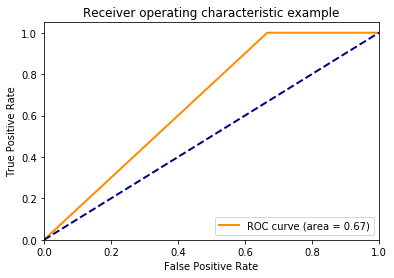

In [16]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

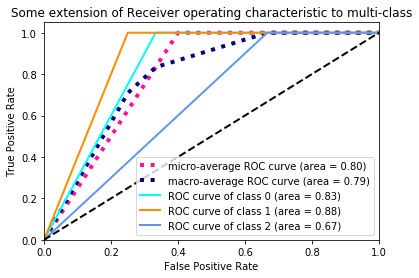

In [17]:

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += scipy.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = itertools.cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()